In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#可以製作互動式圖表的套件
# import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot,init_notebook_mode
%matplotlib inline
#為可以將pandas和plotly結合的套件
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
#放我們的進度條以掌握資料處理進度
import os

In [2]:
#確診資料
df = pd.read_csv('case_data.csv')

#Iphone data
apple_df = pd.read_csv('applemobilitytrends-2020-04-24.csv')

display(apple_df.head(3))
df.head(3)

,geo_type,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,...,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24
0,country/region,Albania,driving,100,95.30,101.43,97.20,103.55,112.67,104.83,...,30.67,30.00,29.26,22.94,24.55,31.51,33.59,31.69,33.94,30.22
1,country/region,Albania,walking,100,100.68,98.93,98.46,100.85,100.13,82.13,...,35.48,39.15,34.58,27.76,27.93,36.72,34.46,35.39,34.80,34.63
2,country/region,Argentina,driving,100,97.07,102.45,111.21,118.45,124.01,95.44,...,23.55,24.40,27.17,23.19,14.54,26.67,27.25,27.61,28.73,30.99


,確定病名,個案研判日,縣市,性別,是否為境外移入,年齡層,確定病例數
0,嚴重特殊傳染性肺炎,2020/01/22,高雄市,女,是,55-59,1
1,嚴重特殊傳染性肺炎,2020/01/24,台北市,女,是,50-54,1
2,嚴重特殊傳染性肺炎,2020/01/24,高雄市,男,是,55-59,1


In [3]:
display(df.info())

colors = sns.color_palette()
#將個案研判日的data type轉為datetime
df.個案研判日 = pd.to_datetime(df.個案研判日)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   確定病名     398 non-null    object
 1   個案研判日    398 non-null    object
 2   縣市       398 non-null    object
 3   性別       398 non-null    object
 4   是否為境外移入  398 non-null    object
 5   年齡層      398 non-null    object
 6   確定病例數    398 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 21.9+ KB


None

# 看一下疫情資料

count    72.000000
mean      5.958333
std       6.987791
min       1.000000
25%       1.000000
50%       2.000000
75%       8.000000
max      26.000000
Name: 確定病例數, dtype: float64

Text(0.5, 1.0, 'Confirmed Case distribution with time')

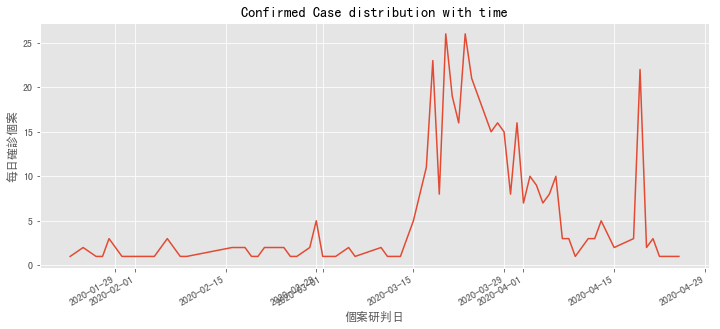

In [4]:
plt.style.use('ggplot')

#呈現病例數
display(df.groupby('個案研判日')['確定病例數'].sum().describe())

#疫情確診走勢
plt.figure(figsize = (12,5))
df.groupby('個案研判日')['確定病例數'].sum().plot()
plt.ylabel('每日確診個案')
plt.title('Confirmed Case distribution with time')

Text(0.5, 1.0, 'Cumulative confirmed case')

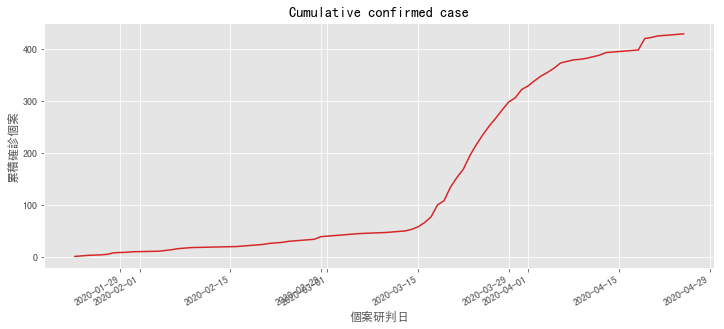

In [5]:
#累積疫情確診走勢
plt.figure(figsize = (12,5))
df.groupby('個案研判日')['確定病例數'].sum().cumsum().plot(color = colors[3])
plt.ylabel('累積確診個案')
plt.title('Cumulative confirmed case')

Apple 之前釋出了Apple maps的資料，蘋果地圖（英語：Apple Maps）是一套由蘋果公司研發的電子地圖服務，也是macOS、iOS以及watchOS系統中預設的地圖服務軟體。手機可以追得到你的定位，所以收集了開車、走路、搭乘大眾交通運輸工具等資料，我認為這個資料可以作為代理變數來解釋人們是否減少外出、呈現社交距離的資料，檢測social distance與疫情的關係。另外細粒度到城市，所以也可以分別看看不同城市的政策效果，我們來看看政策發布日期之後社交距離與案例判斷的關係，藉此查看政策對這些變數的影響效果。


# 處理一下Apple data

這份資料格式並沒有Tidy，我們想要的是以date為index , distance為value的序列結構才是，所以要稍微整理一下。

In [17]:
#我們先看看raw data的樣子
print('整形前')
display(apple_df.head(3))
print('-'*100)


#先找出臺灣的資料
tw_apple_df = apple_df.query('region == "Taiwan"')

#然後轉過來XD，用T就是transfrom~ 並且從第三個開始才是日期，所以擷取出來
tw_apple_df = tw_apple_df.T.iloc[3:,:]

#幫columns標上欄位名稱（header）
tw_apple_df.columns = ['driving' , 'transit' , 'walking']

#印出來
print('整形後')
tw_apple_df.head()

整形前


,geo_type,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,...,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24
0,country/region,Albania,driving,100,95.30,101.43,97.20,103.55,112.67,104.83,...,30.67,30.00,29.26,22.94,24.55,31.51,33.59,31.69,33.94,30.22
1,country/region,Albania,walking,100,100.68,98.93,98.46,100.85,100.13,82.13,...,35.48,39.15,34.58,27.76,27.93,36.72,34.46,35.39,34.80,34.63
2,country/region,Argentina,driving,100,97.07,102.45,111.21,118.45,124.01,95.44,...,23.55,24.40,27.17,23.19,14.54,26.67,27.25,27.61,28.73,30.99


----------------------------------------------------------------------------------------------------
整形後


,driving,transit,walking
2020-01-13,100,100,100
2020-01-14,106.97,107.64,107.89
2020-01-15,113.81,119.93,118.61
2020-01-16,118.64,124.1,119.74
2020-01-17,136.4,135.24,136.24


In [7]:
#將index(date)的格式轉換為日期，不然mapping會都是nan!
tw_apple_df.index = pd.to_datetime(tw_apple_df.index)

#統計出累積確診人數
cumsum_confirmed_case = df.groupby('個案研判日')['確定病例數'].sum().cumsum()


all_df = tw_apple_df.copy()
#透過map(映射)將apple , 確診資料合併在一起
all_df['cumsum_case'] = tw_apple_df.index.map(cumsum_confirmed_case)

#看看資料表現在的樣子
display(all_df.describe())
all_df.tail()

,cumsum_case
count,71.000000
mean,172.591549
std,161.652677
min,1.000000
25%,29.000000
50%,77.000000
75%,351.500000
max,428.000000


,driving,transit,walking,cumsum_case
2020-04-20,78.02,47.52,69.61,422.0
2020-04-21,74.71,46.98,66.9,425.0
2020-04-22,75.42,48.34,67.3,426.0
2020-04-23,76.23,48.84,67.45,427.0
2020-04-24,96.47,64.15,92.28,428.0


好的，接下來我們想來看看以下兩個政策跟疫情的關係：

1. 3/1居家檢疫隔離服務 : 落實檢疫，會減少人的移動距離嗎？

此政策想要解決的問題是有些居家檢疫或者隔離者偷跑，或是遇到一些生活上的不便，但是不好向外求助的問題。
居家檢疫隔離服務理論上會大幅減少人民外出、並且整合地方與中央政府，我們來看看政策的說明：

此政策可以確保民眾於居家檢疫及居家隔離期間能獲得各項生活、心理及就醫支持，鼓勵配合防疫措施的民眾落實居家檢疫及居家隔離作業，降低民眾對居家檢疫及隔離對象的對立，提升全民防疫信心。

重點綱要包括對象關懷、就醫協助、交通安排、生活支持及專線服務等，並於三月一日開始運作。


2. 4/1 Social Distance : 宣導社交距離能否減緩疫情呢？


社交距離：美國麻省理工學院（MIT）一項報告指出，由於新冠肺炎傳染力極強，社交距離2公尺並不能完全阻隔傳播，建議若必要的話，最好能相隔 8 公尺。不過每種移動方式的社交距離其實都不相同，舉例來說，搭乘大眾運輸工具無法拉開彼此的距離，就須全程佩戴口罩。因此在台灣搭乘大眾運輸工具，除了要量體溫，也要求必須戴口罩，才能進站和搭車；在餐廳吃飯時無法戴口罩，就需要用隔屏隔開。指揮中心甚至明文建議，朋友或情侶面對面交談時也需佩戴口罩。
 
這份「社交距離注意事項」是分別就餐廳、校園或辦公室、大眾運輸、賣場或其他營業場所、排隊人龍、特殊機構(如長照機構、監獄等)及其他特定場所等不同情境，提供維持社交距離的個別規範。建議民眾在防疫期間，務必遵守，以降低小區感染與傳播的機會，保護自己也保護他人。官方表示，相信國人的水平及自律精神，初期以柔性建議為主，暫時不會制訂罰則。


Policy Date : 中央流行疫情指揮中心3月31日宣布「社交距離指引」的原則，強調室外應保持1公尺、室內應為1.5公尺

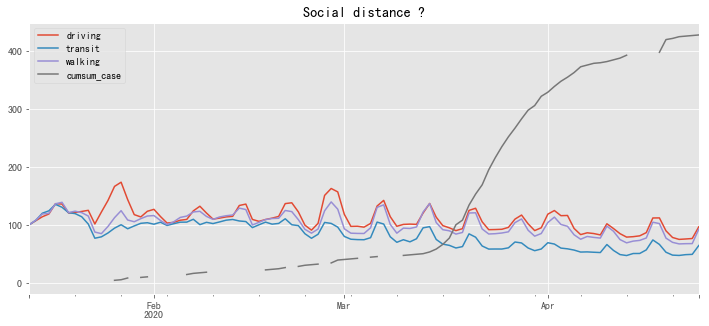

In [8]:
all_df.plot(figsize = (12,5) , title= 'Social distance ?' )

我們發現這樣並不是很好看出關係，原因是距離跟確診人數的尺度有差，在後面上升超過了距離，所以我們應該要用雙軸圖來看，首先我們來看看3/1的政策效果。

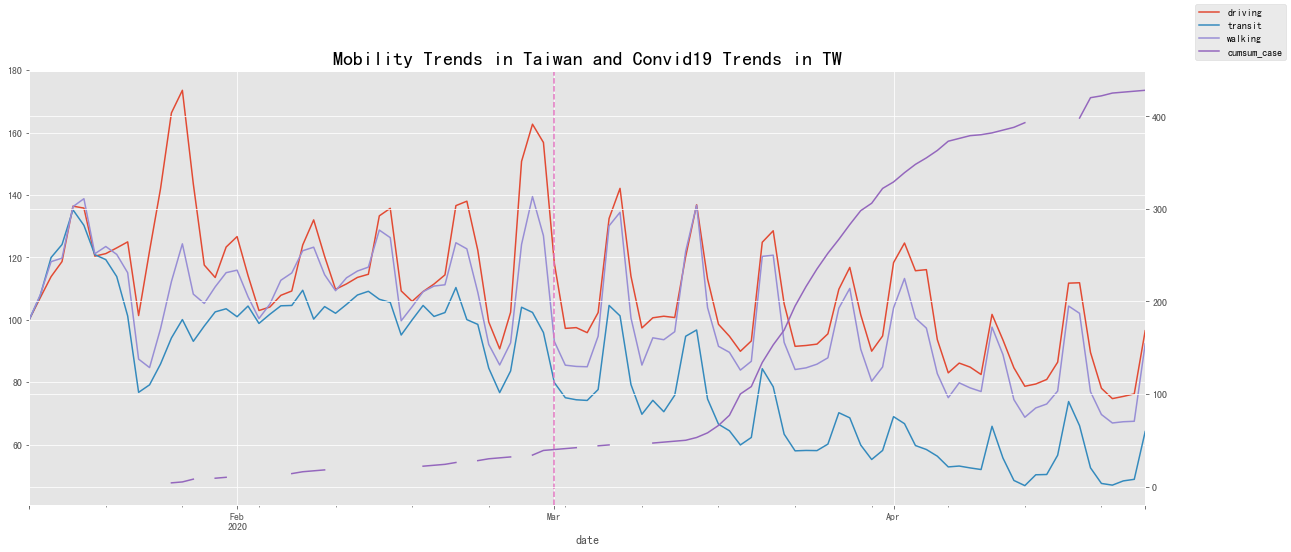

In [9]:
#政策生效日期
POLICY_DATE = '2020-03-01'


#畫出單邊軸
ax = all_df.plot( y=['driving', 'transit', 'walking'], legend=False,figsize=(20,8))
ax2 = ax.twinx()
#補上雙邊軸
all_df.plot(y="cumsum_case", ax=ax2, legend=False, color=colors[4])

#一些畫圖設置
ax.figure.legend()
ax.set_xlabel('date')
ax.set_title('Mobility Trends in Taiwan and Convid19 Trends in TW' , fontsize= 20)

#標註出政策生效日期
ax.axvline(POLICY_DATE , color = colors[6] ,  linestyle='--')
plt.show()

哦，可以看到social distance似乎有下降，但是還是不太明顯，原因手機移動的週期性不好觀察，也許畫出均線會好一點，我們使用平移的方法來描繪出移動距離的變化。

Text(0.5, 1.0, '20 days moving average')

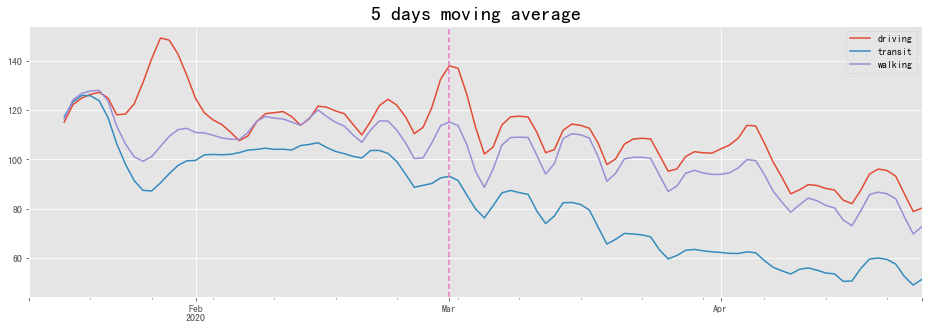

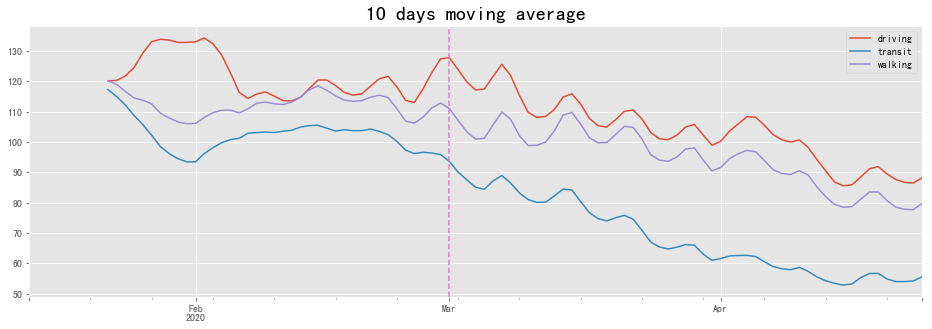

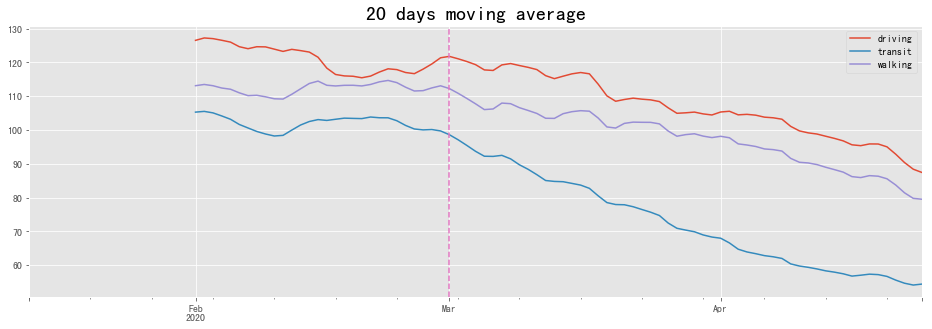

In [10]:
ax = all_df[['driving', 'transit', 'walking']].rolling(5).mean().plot(figsize=  (16,5))
#標註出政策生效日期
ax.axvline(POLICY_DATE , color = colors[6] ,  linestyle='--')
ax.set_title('5 days moving average' , fontsize= 20)

ax = all_df[['driving', 'transit', 'walking']].rolling(10).mean().plot(figsize=  (16,5))
#標註出政策生效日期
ax.axvline(POLICY_DATE , color = colors[6] ,  linestyle='--')
ax.set_title('10 days moving average' , fontsize= 20)


ax = all_df[['driving', 'transit', 'walking']].rolling(20).mean().plot(figsize=  (16,5))
#標註出政策生效日期
ax.axvline(POLICY_DATE , color = colors[6] ,  linestyle='--')
ax.set_title('20 days moving average' , fontsize= 20)

這樣清楚了很多，我們可以看到人們真的從大概3/1開始減少了許多移動距離，政策生效，並且transit(大眾運輸)下降得最多，表示人們也減少了許多搭乘大眾交通運輸工具的機會。 

,driving,transit,walking
2020-03-01,118.04,79.84,93.01


,driving,transit,walking
2020-04-24,96.47,64.15,92.28


,driving,transit,walking
2020-04-24,-21.57,-15.69,-0.73


Text(0.5, 1.0, 'Cycle trends')

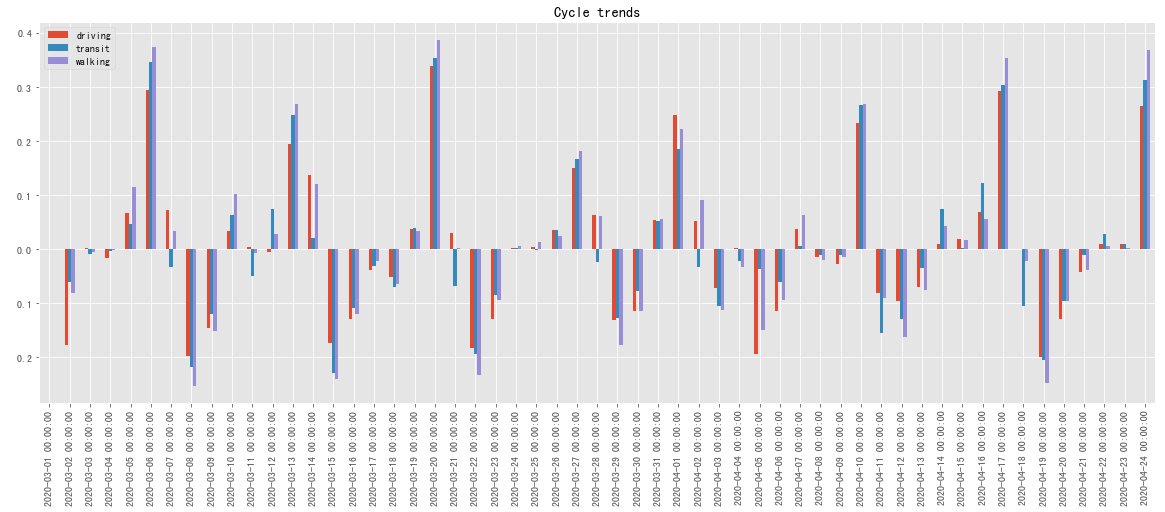

In [11]:
#選出觀察的時間範圍
observe_period = all_df[['driving', 'transit', 'walking']].loc['2020-03-01' : '2020-04-24']

first_date = observe_period.head(1)
last_date = observe_period.tail(1)
display(first_date , last_date)

display(np.subtract(last_date,first_date))
observe_period.pct_change().plot(kind = 'bar' , figsize = (20,7))
plt.title('Cycle trends')

駕駛汽車似乎比較不受影響，不過走路、搭乘大眾運輸工具就下降比較多，猜測是因為大家不出門、也減少搭乘交通運輸工具，但是開車因為是內部空間，所以比較多人沒感覺？不過駕駛計程車、UBER、巴士等營業用車的駕駛人務必戴上口罩以保護自己。

我們來看看4/4，那一天指揮中心宣布搭乘大眾運輸工具應全面戴口罩，來看看政策：

未戴者不聽勸最高可罰1萬5,000元。原因是台灣已經有零星社區感染個案，出現不明感染源本土案例，更重要的是歐美疫情延燒，境外移入個案增加，需保持社交距離（人與人室內1.5公尺、室外1公尺）防堵疫情，因此才會一改先前2月7日衛福部網站說捷運、公車等大眾運輸工具不必戴口罩的呼籲。

我們來看看交通運輸工具的移動距離是否會因此顯著下降。

,driving,transit,walking
2020-01-13,100,100,100


,driving,transit,walking
2020-04-24,96.47,64.15,92.28


,driving,transit,walking
2020-04-24,-3.53,-35.85,-7.72


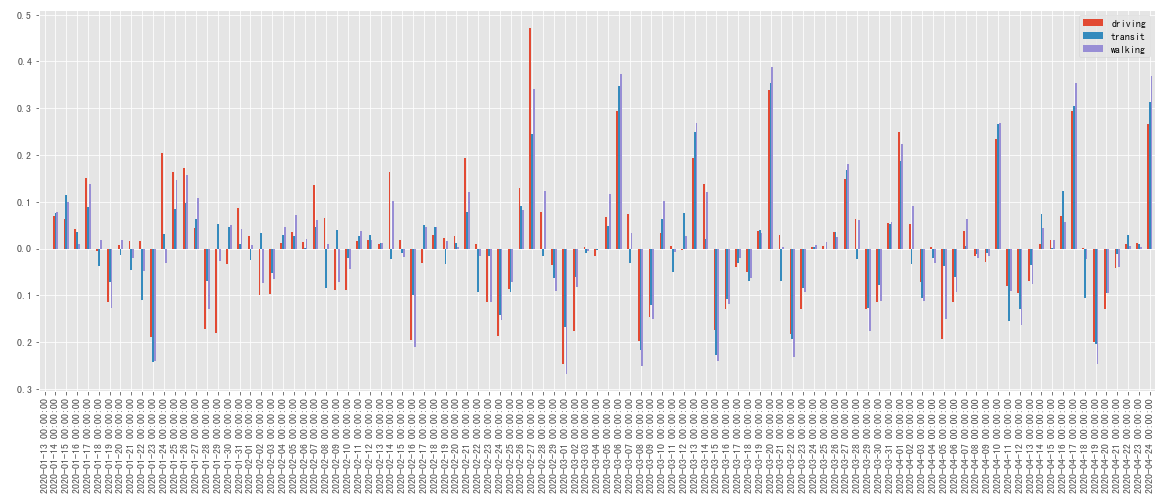

In [12]:
#交通運輸更嚴格
POLICY_DATE = '2020-04-04'

#選出觀察的時間範圍
observe_period = all_df[['driving', 'transit', 'walking']]


first_date = observe_period.head(1)
last_date = observe_period.tail(1)
display(first_date , last_date)

display(np.subtract(last_date,first_date))
observe_period.pct_change().plot(kind = 'bar' , figsize = (20,7))

,driving,transit,walking
2020-01-13,100,100,100
2020-01-14,106.97,107.64,107.89
2020-01-15,113.81,119.93,118.61


,driving,transit,walking
2020-04-20,-11.49,-5.01,-7.31
2020-04-21,-3.31,-0.54,-2.71
2020-04-22,0.71,1.36,0.4
2020-04-23,0.81,0.5,0.15
2020-04-24,20.24,15.31,24.83


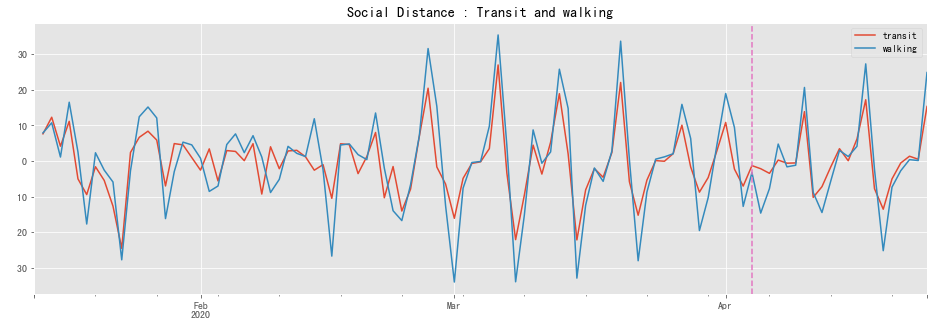

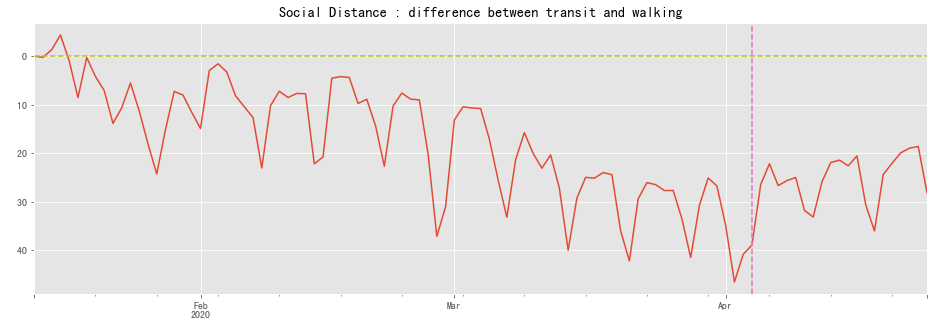

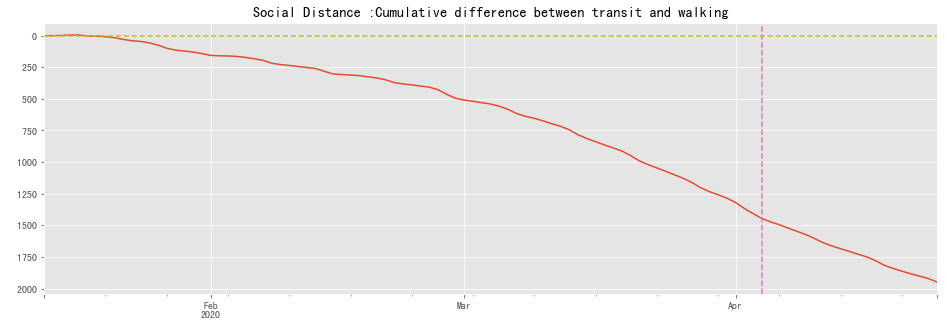

In [13]:
display(observe_period.head(3))


#我們做差值來看看
display( observe_period.diff().tail())
ax = observe_period.diff()[['transit', 'walking']].plot(figsize=  (16,5))
ax.axvline(POLICY_DATE , color = colors[6] ,  linestyle='--')
ax.set_title('Social Distance : Transit and walking')
plt.show()

#計算差值
diff = observe_period['transit'] - observe_period['walking']
#我們做差值來看看
ax = diff.plot(figsize=  (16,5))
ax.axvline(POLICY_DATE , color = colors[6] ,  linestyle='--')
ax.axhline(0 , color = colors[8] , linestyle = '--')
ax.set_title('Social Distance : difference between transit and walking')
plt.show()


#累積差值觀察
ax = diff.cumsum().plot(figsize=  (16,5))
ax.axvline(POLICY_DATE , color = colors[6] ,  linestyle='--')
ax.set_title('Social Distance :Cumulative difference between transit and walking')
ax.axhline(0 , color = colors[8] , linestyle = '--')

ok , 搭乘交通運輸工具跟走路本身差距就持續在拉大，看起來不是因為交通運輸工具口罩政策的關係。統計上要確認這點可以做時間序列的結構變化 (structural break) 檢定，確定在實驗開始前後兩組差值有顯著變化。 不過在這邊我覺得蠻明顯的是差距持續在擴大。當然，我們也可以看看不同城市之間的執行效果。

那麼4/1的政策變化呢？宣導社交距離對疫情有放緩效果嗎？

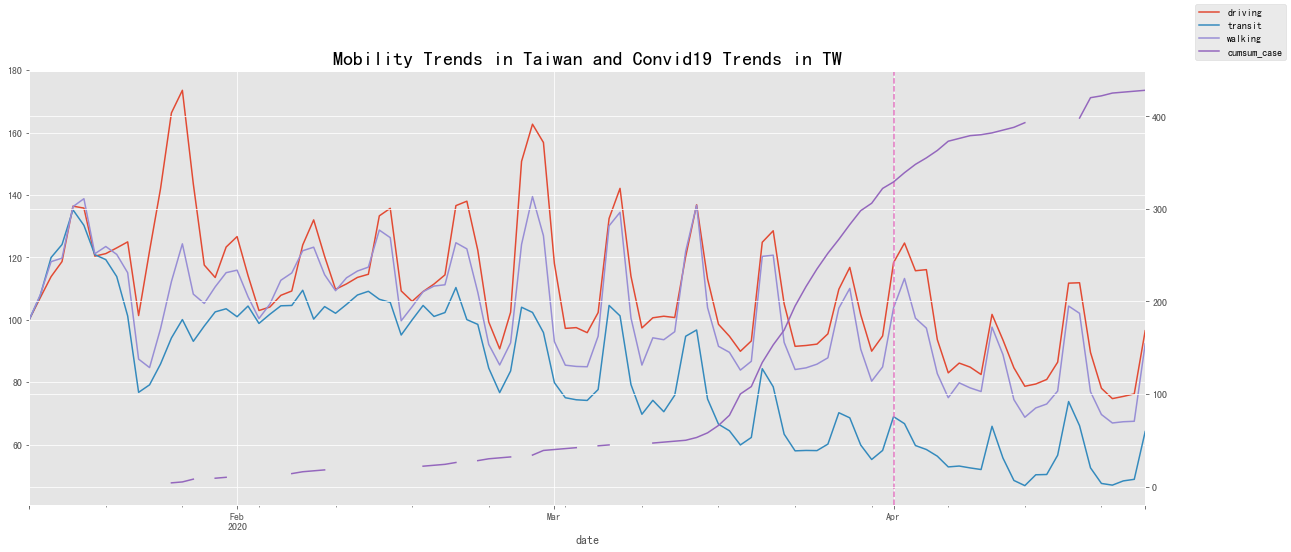

In [14]:
#政策生效日期
POLICY_DATE = '2020-04-01'


#畫出單邊軸
ax = all_df.plot( y=['driving', 'transit', 'walking'], legend=False,figsize=(20,8))
ax2 = ax.twinx()
#補上雙邊軸
all_df.plot(y="cumsum_case", ax=ax2, legend=False, color=colors[4])

#一些畫圖設置
ax.figure.legend()
ax.set_xlabel('date')
ax.set_title('Mobility Trends in Taiwan and Convid19 Trends in TW' , fontsize= 20)

#標註出政策生效日期
ax.axvline(POLICY_DATE , color = colors[6] ,  linestyle='--')
plt.show()

似乎有趨緩一點？我們可以畫出差分後的數據來看看效果

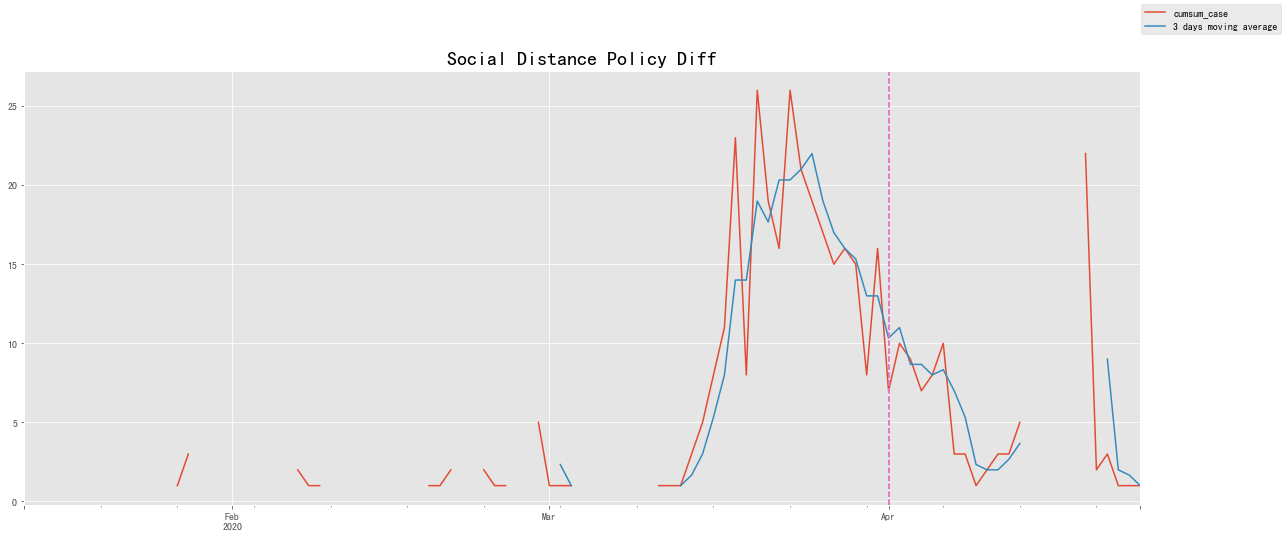

In [15]:
ax = all_df.cumsum_case.diff().plot(figsize = (20,8))
ax.axvline(POLICY_DATE , color = colors[6] ,  linestyle='--')



ax = all_df.cumsum_case.diff().rolling(3).mean().plot(figsize = (20,8) , label = '3 days moving average')
ax.axvline(POLICY_DATE , color = colors[6] ,  linestyle='--')
ax.set_title('Social Distance Policy Diff' , fontsize = 20)
ax.figure.legend()

In [16]:
peak = all_df.cumsum_case.diff().rolling(3).mean() == 22

all_df.cumsum_case.diff().rolling(3).mean().loc[peak]

2020-03-25    22.0
Name: cumsum_case, dtype: float64

之前就持續在下降了，這邊我們可以改看看，什麼時候是最高峰，而最高峰之後做了什麼作為之後的政策參考，3-25似乎疫情漸漸得到控制。